# Hotel Data Cleaning and EDA (Explainatory Data Analysis)

## Importing Libraries
importing libraries will be using (usually i update this whenever i need to use a new library)

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


## Loading and Diagnosis
Loading the data which i got from Kaggle (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
then i will be running some fast diagnosis to see if i need to clean it or not

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Checking the data it seems we have a lot of mistypes of data columns and also alot of null values

### Data Cleaning


Let's start with checking the real numbers of the nulls values

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Seeing that company column is mostly nulls, it's better to get rid of it
i will handle the rest later

In [6]:
df = df.drop(['company'], axis=1)

Seems like the data have a lot of Duplicated data so we better get rid of that as well

In [7]:
df.duplicated().sum()

np.int64(32001)

got rid of the null values while we are at it and it seems we still have a healthy number of data

In [8]:
df.drop_duplicates(inplace=True)
df= df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75071 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75071 non-null  object 
 1   is_canceled                     75071 non-null  int64  
 2   lead_time                       75071 non-null  int64  
 3   arrival_date_year               75071 non-null  int64  
 4   arrival_date_month              75071 non-null  object 
 5   arrival_date_week_number        75071 non-null  int64  
 6   arrival_date_day_of_month       75071 non-null  int64  
 7   stays_in_weekend_nights         75071 non-null  int64  
 8   stays_in_week_nights            75071 non-null  int64  
 9   adults                          75071 non-null  int64  
 10  children                        75071 non-null  float64
 11  babies                          75071 non-null  int64  
 12  meal                            7507

### Data type corrections
Checking why children is a float, i don't think i've ever heard of someone having 1.5 kid <br>
also i saw that i can change the reservation status date to datetime format


In [10]:
df.children.value_counts()

children
0.0     67388
1.0      4253
2.0      3372
3.0        57
10.0        1
Name: count, dtype: int64

In [11]:
df['children'] = df['children'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75071 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           75071 non-null  object        
 1   is_canceled                     75071 non-null  int64         
 2   lead_time                       75071 non-null  int64         
 3   arrival_date_year               75071 non-null  int64         
 4   arrival_date_month              75071 non-null  object        
 5   arrival_date_week_number        75071 non-null  int64         
 6   arrival_date_day_of_month       75071 non-null  int64         
 7   stays_in_weekend_nights         75071 non-null  int64         
 8   stays_in_week_nights            75071 non-null  int64         
 9   adults                          75071 non-null  int64         
 10  children                        75071 non-null  int64         
 11  babies

## EDA (Explainatory Data Analysis)
but first let's see what are we trying to find out: <br>
<list> Which month have more frequent visits?

### Doing some checkups
Well now that the data seems in an acceptable state, let's try to get any insights from it

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,75071.0,0.29921,0.0,0.0,0.0,1.0,1.0,0.457915
lead_time,75071.0,86.921981,0.0,18.0,59.0,134.0,629.0,85.956707
arrival_date_year,75071.0,2016.22552,2015.0,2016.0,2016.0,2017.0,2017.0,0.682752
arrival_date_week_number,75071.0,26.919716,1.0,16.0,28.0,37.0,53.0,13.363077
arrival_date_day_of_month,75071.0,15.797818,1.0,8.0,16.0,24.0,31.0,8.845078
stays_in_weekend_nights,75071.0,1.070253,0.0,0.0,1.0,2.0,16.0,1.032607
stays_in_week_nights,75071.0,2.751036,0.0,1.0,2.0,4.0,41.0,2.042798
adults,75071.0,1.924591,0.0,2.0,2.0,2.0,26.0,0.519041
children,75071.0,0.148899,0.0,0.0,0.0,0.0,10.0,0.471509
babies,75071.0,0.01051,0.0,0.0,0.0,0.0,10.0,0.113361


Data looks good, now let's see if there is any relations or grouping we should do

In [14]:
df.select_dtypes(include=[np.number]).corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.170611,0.090727,-0.006571,0.003537,0.039834,0.065310,0.059568,0.065425,-0.021319,-0.052954,0.062726,-0.040049,-0.084112,-0.043175,-0.001203,0.114205,-0.181161,-0.149214
lead_time,0.170611,1.000000,0.149534,0.094024,0.005546,0.205768,0.279656,0.093325,0.016012,-0.005385,-0.082262,0.028263,-0.047900,0.076354,0.024946,0.131755,-0.022751,-0.084580,0.006194
arrival_date_year,0.090727,0.149534,1.000000,-0.504504,-0.009329,-0.000650,-0.002006,0.062198,0.046433,-0.021158,0.007537,-0.076474,0.012158,0.010443,-0.019751,-0.036230,0.195303,-0.043218,0.057892
arrival_date_week_number,-0.006571,0.094024,-0.504504,1.000000,0.089948,0.019688,0.027922,0.009319,0.008908,0.011927,-0.022576,0.008587,-0.027415,0.016927,0.017958,0.017096,0.088661,0.007040,0.048295
arrival_date_day_of_month,0.003537,0.005546,-0.009329,0.089948,1.000000,-0.018863,-0.027853,0.001020,0.014836,-0.002876,-0.003011,-0.007122,0.001782,0.007718,0.009117,0.007235,0.019059,0.005325,-0.002136
stays_in_weekend_nights,0.039834,0.205768,-0.000650,0.019688,-0.018863,1.000000,0.536579,0.058822,0.016873,0.014517,-0.061265,-0.009132,-0.037191,0.038342,0.127818,-0.038164,-0.007553,-0.037404,0.000593
stays_in_week_nights,0.065310,0.279656,-0.002006,0.027922,-0.027853,0.536579,1.000000,0.068516,0.019748,0.015499,-0.064455,-0.006456,-0.036157,0.065781,0.166173,-0.003256,0.010420,-0.039083,0.003076
adults,0.059568,0.093325,0.062198,0.009319,0.001020,0.058822,0.068516,1.000000,0.001302,0.010300,-0.094961,-0.014411,-0.062865,-0.048816,-0.035295,-0.026861,0.256155,0.028347,0.097736
children,0.065425,0.016012,0.046433,0.008908,0.014836,0.016873,0.019748,0.001302,1.000000,0.009849,-0.022942,-0.012784,-0.015076,0.038179,0.028398,-0.021707,0.332417,0.045986,0.026084
babies,-0.021319,-0.005385,-0.021158,0.011927,-0.002876,0.014517,0.015499,0.010300,0.009849,1.000000,-0.008359,-0.003172,-0.004144,0.092774,0.035442,-0.006782,0.018038,0.033000,0.088572


Idk about you but i can't focus with all those numbers so let's try a visualization of these relations using heat maps

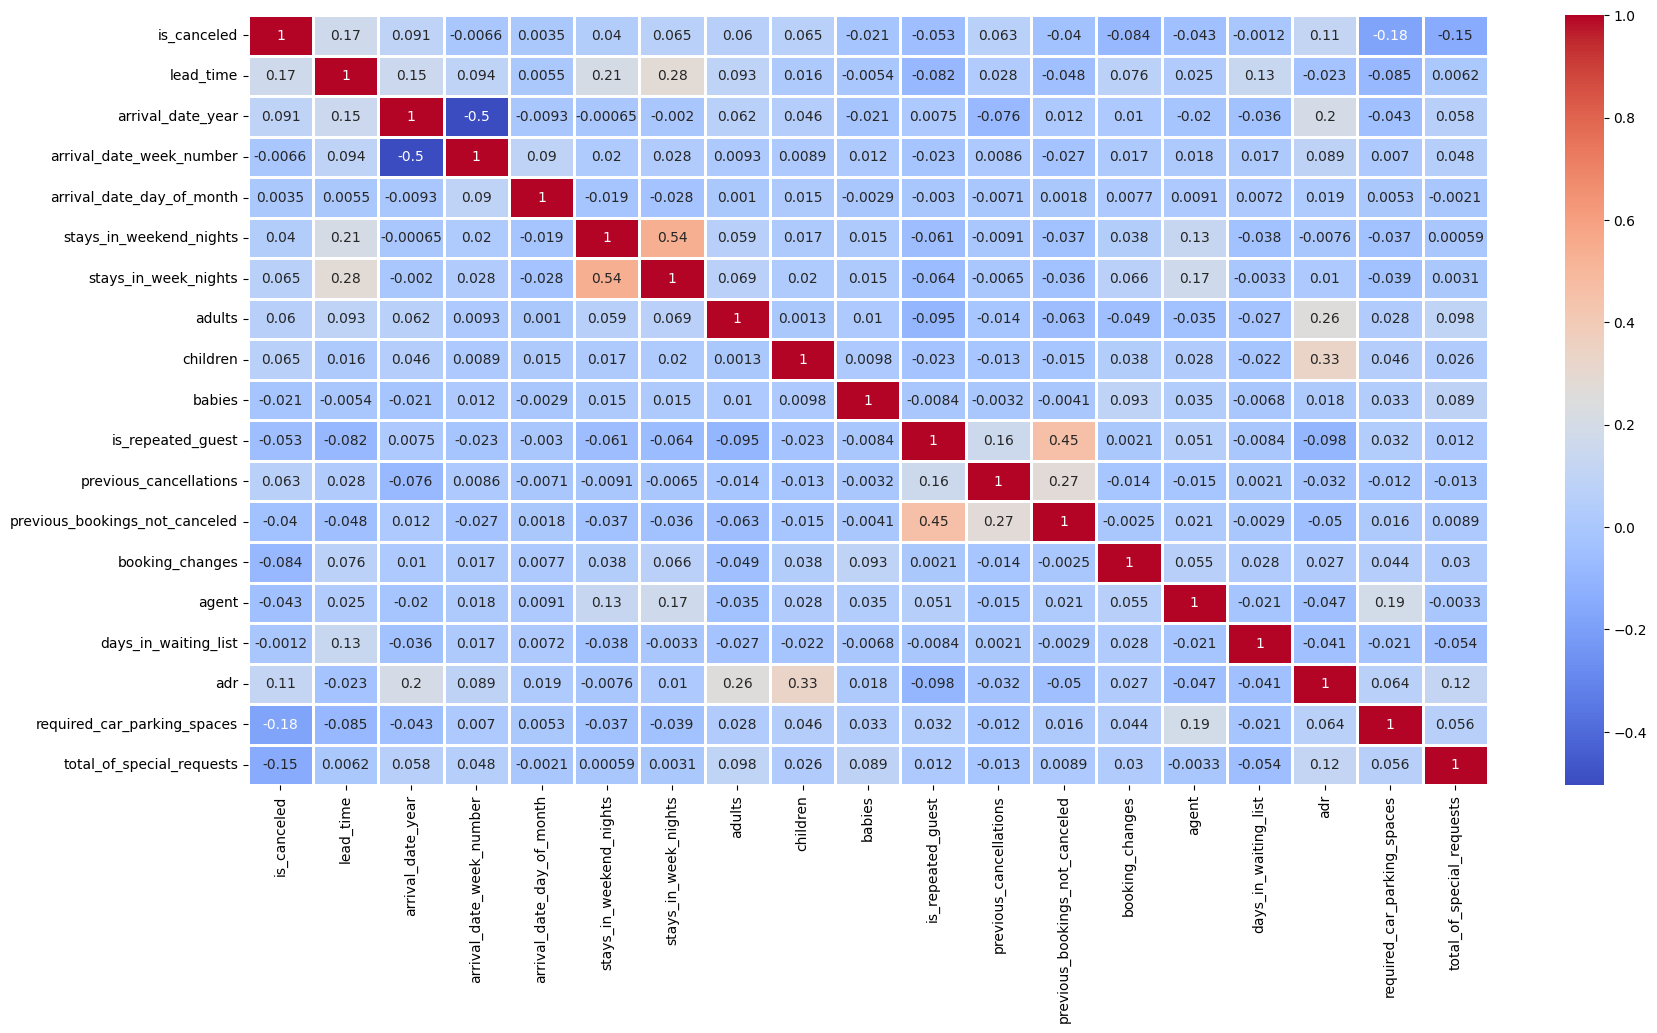

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.show()

On an interesting turn it seems that 16% of customers who cancel their resevation before seem to return to the same hotel <br>\
but 45% of those who don't cancel return to the same hotel

Let's see if the city hotels or resorts are canceled more

In [16]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              32619
              1              15215
Resort Hotel  0              19990
              1               7247
Name: count, dtype: int64

In [37]:
df.groupby('arrival_date_month')['hotel'].count().sort_values(ascending=False)

arrival_date_month
August       10210
July          9169
May           7227
June          6999
April         6915
March         6265
September     5855
October       5605
February      4915
December      4202
November      4062
January       3647
Name: hotel, dtype: int64

Seems like Augest is the highest visit month, which makes sense since families usually like to visit other countries during summer break, it's almost double the average

In [38]:
df.groupby('country')['hotel'].count().sort_values(ascending=False)

country
PRT    19596
GBR     9571
FRA     8321
ESP     6715
DEU     5150
       ...  
MRT        1
SLE        1
SDN        1
UMI        1
VGB        1
Name: hotel, Length: 174, dtype: int64

now according to this data it seems that portigues are by far the country with most hotel bookings then Great Britin!

## Visualization

Let's try to show this in graphs